# Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = "white", color_codes = True)
import warnings 
warnings.filterwarnings("ignore")

In [2]:
honey = pd.read_csv(r"C:\Users\PC\OneDrive - Universiti Malaya\Desktop\UM Degree\SEM 5\Data Science Project\FP035-2021.csv")

# Exploratory Data Analysis

### Summary of dataset

In [3]:
honey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   No                                  158 non-null    int64  
 1   Sample                              158 non-null    object 
 2   PH                                  158 non-null    float64
 3   TPC (µg GAE/mg honey)               158 non-null    float64
 4   TFC (µg QE/mg honey)                158 non-null    float64
 5   ABTS (% inhibition)                 158 non-null    float64
 6   FRAP (µg FeSO4/mg honey)            158 non-null    float64
 7   Water content (% weight/weight)     158 non-null    object 
 8   Fructose content (% weight/weight)  158 non-null    float64
 9   Glucose content (% weight/weight)   158 non-null    float64
 10  Remark                              41 non-null     object 
dtypes: float64(7), int64(1), object(3)
memory usa

In [4]:
honey.head()

,No,Sample,PH,TPC (µg GAE/mg honey),TFC (µg QE/mg honey),ABTS (% inhibition),FRAP (µg FeSO4/mg honey),Water content (% weight/weight),Fructose content (% weight/weight),Glucose content (% weight/weight),Remark
0,1,A itama i,3.1,147.11,40.43,12.43,7.62,29.1,71.2,70.9,NaN
1,2,A itama ii,3.1,158.81,43.36,15.31,11.41,29.8,70.5,70.2,NaN
2,3,A itama iii,3.0,152.83,44.57,15.21,14.63,30.5,69.7,69.4,NaN
3,4,A itama iv,3.2,203.06,43.97,20.40,20.21,28.8,71.5,71.3,NaN
4,5,A itama v,3.3,178.09,44.59,17.50,16.19,26.1,74.3,74.1,NaN


There are a total of 158 rows and 10 colums altogether. In addition, we can see that there are no null-values in the dataset. 

### Looking for duplicate values

In [5]:
honey.duplicated().sum()

0

### Unique values

In [6]:
honey["Sample"].unique()

array(['A itama i', 'A itama ii', 'A itama iii', 'A itama iv',
       'A itama v', 'A thoracica i', 'A thoracica ii', 'A thoracica iii',
       'A thoracica iv', 'A thoracica v', 'B itama i', 'B itama ii',
       'B itama iii', 'B itama iv', 'B itama v', 'B thoracica i',
       'B thoracica ii', 'B thoracica iii', 'B thoracica iv',
       'B thoracica v', 'C itama i', 'C itama ii', 'C itama iii',
       'C itama iv', 'C itama v', 'C thoracica i', 'C thoracica ii',
       'C thoracica iii', 'C thoracica iv', 'C thoracica v', 'D itama i',
       'D itama ii', 'D itama iii', 'D apicalis i', 'D apicalis ii',
       'D apicalis iii', 'D thoracica i', 'D thoracica ii',
       'D thoracica iii', 'D erythrogastra i', 'D erythrogastra ii',
       'D erythrogastra iii', 'D binghami i', 'D binghami ii',
       'D binghami iii', 'E itama i', 'E itama ii', 'E itama iii',
       'E itama iv', 'E itama v', 'E Binghami i', 'E Binghami ii',
       'E Binghami iii', 'E Binghami iv', 'E Binghami v', 'E F

### Find null values

In [7]:
honey.isnull().sum()

No                                      0
Sample                                  0
PH                                      0
TPC (µg GAE/mg honey)                   0
TFC (µg QE/mg honey)                    0
ABTS (% inhibition)                     0
FRAP (µg FeSO4/mg honey)                0
Water content (% weight/weight)         0
Fructose content (% weight/weight)      0
Glucose content (% weight/weight)       0
Remark                                117
dtype: int64

### Datatypes

In [8]:
honey.dtypes

No                                      int64
Sample                                 object
PH                                    float64
TPC (µg GAE/mg honey)                 float64
TFC (µg QE/mg honey)                  float64
ABTS (% inhibition)                   float64
FRAP (µg FeSO4/mg honey)              float64
Water content (% weight/weight)        object
Fructose content (% weight/weight)    float64
Glucose content (% weight/weight)     float64
Remark                                 object
dtype: object

# Data Preprocessing

### Renaming Columns for better understanding

No : Sample_ID

Sample : Sample_Name 

TPC (µg GAE/mg honey) : TPC #referring to Total Phenolic Content

TFC (µg QE/mg honey) : TFC #referring to Total Flavonoid Content

ABTS (% inhibition) : ABTS

FRAP (µg FeSO4/mg honey) : FRAP

Water Content (% weight/weight) : Water

Fructose Content (% weight/weight) : Fructose

Glucose Content (% weight/weight) : Glucose


In [9]:
honey=honey.rename(columns={"No" : "Sample_ID", "Sample" : "Sample_Name", "TPC (µg GAE/mg honey)" : "TPC" , 
                            "TFC (µg QE/mg honey)" : "TFC", "ABTS (% inhibition)" : "ABTS" , 
                            "FRAP (µg FeSO4/mg honey)" : "FRAP" , "Water content (% weight/weight)" : "Water" , 
                            "Fructose content (% weight/weight)" : "Fructose", 
                            "Glucose content (% weight/weight)" : "Glucose"})
honey.head()

,Sample_ID,Sample_Name,PH,TPC,TFC,ABTS,FRAP,Water,Fructose,Glucose,Remark
0,1,A itama i,3.1,147.11,40.43,12.43,7.62,29.1,71.2,70.9,NaN
1,2,A itama ii,3.1,158.81,43.36,15.31,11.41,29.8,70.5,70.2,NaN
2,3,A itama iii,3.0,152.83,44.57,15.21,14.63,30.5,69.7,69.4,NaN
3,4,A itama iv,3.2,203.06,43.97,20.40,20.21,28.8,71.5,71.3,NaN
4,5,A itama v,3.3,178.09,44.59,17.50,16.19,26.1,74.3,74.1,NaN


### Separate sample extract location (State Code) from Sample_Name

Since in each Sample_Name there is a sate code atssociated with it, referring to the place of honey extraction. This information could be transferred to another column as State.

In [10]:
honey[["State" , "Sample_Name"]] = honey.Sample_Name.str.split(" ", 1, expand=True,)
honey.head()

,Sample_ID,Sample_Name,PH,TPC,TFC,ABTS,FRAP,Water,Fructose,Glucose,Remark,State
0,1,itama i,3.1,147.11,40.43,12.43,7.62,29.1,71.2,70.9,NaN,A
1,2,itama ii,3.1,158.81,43.36,15.31,11.41,29.8,70.5,70.2,NaN,A
2,3,itama iii,3.0,152.83,44.57,15.21,14.63,30.5,69.7,69.4,NaN,A
3,4,itama iv,3.2,203.06,43.97,20.40,20.21,28.8,71.5,71.3,NaN,A
4,5,itama v,3.3,178.09,44.59,17.50,16.19,26.1,74.3,74.1,NaN,A


### Change the value of state codes to real state names

State Codes to State Names respectively are as below :-

A = Kedah	

B = Kedah 

C = Kedah	

D = Selangor

E = Selangor

F = Johor 	

G = Johor 

H = Johor 

I = Pahang 	

J = Pahang 	

K = Terengganu 	

L = Terengganu 

In [11]:
honey["State"] = honey["State"].replace(["A","B","C"], "Kedah")
honey["State"] = honey["State"].replace(["D","E"], "Selangor")
honey["State"] = honey["State"].replace(["F","G","H"], "Johor")
honey["State"] = honey["State"].replace(["I","J"], "Pahang")
honey["State"] = honey["State"].replace(["K","L"], "Terengganu")
honey.head()

,Sample_ID,Sample_Name,PH,TPC,TFC,ABTS,FRAP,Water,Fructose,Glucose,Remark,State
0,1,itama i,3.1,147.11,40.43,12.43,7.62,29.1,71.2,70.9,NaN,Kedah
1,2,itama ii,3.1,158.81,43.36,15.31,11.41,29.8,70.5,70.2,NaN,Kedah
2,3,itama iii,3.0,152.83,44.57,15.21,14.63,30.5,69.7,69.4,NaN,Kedah
3,4,itama iv,3.2,203.06,43.97,20.40,20.21,28.8,71.5,71.3,NaN,Kedah
4,5,itama v,3.3,178.09,44.59,17.50,16.19,26.1,74.3,74.1,NaN,Kedah


For this project, we only want to know how the physicochemical properties and antioxidant properties in honey affect the identification of stingless bee species. Hence, 'State' attribute is not necessary and should be removed.

### Remove unnecessary species iteration

In [12]:
honey[["Sample_Name", "Iteration"]] = honey.Sample_Name.str.split(" ", 1, expand = True)
honey = honey.drop(columns = "Iteration")
honey.rename(columns={"Sample_Name":"Species"}, inplace = True)
honey.head()

,Sample_ID,Species,PH,TPC,TFC,ABTS,FRAP,Water,Fructose,Glucose,Remark,State
0,1,itama,3.1,147.11,40.43,12.43,7.62,29.1,71.2,70.9,NaN,Kedah
1,2,itama,3.1,158.81,43.36,15.31,11.41,29.8,70.5,70.2,NaN,Kedah
2,3,itama,3.0,152.83,44.57,15.21,14.63,30.5,69.7,69.4,NaN,Kedah
3,4,itama,3.2,203.06,43.97,20.40,20.21,28.8,71.5,71.3,NaN,Kedah
4,5,itama,3.3,178.09,44.59,17.50,16.19,26.1,74.3,74.1,NaN,Kedah


### Observe and change datatype if necessary

In [13]:
honey.dtypes

Sample_ID      int64
Species       object
PH           float64
TPC          float64
TFC          float64
ABTS         float64
FRAP         float64
Water         object
Fructose     float64
Glucose      float64
Remark        object
State         object
dtype: object

It is observed that the attribute 'Water' is in object datatype which is considered a string. This seems off since water content should be in numerical value. We need to check the values of said column. 

In [14]:
honey_water = honey.sort_values(by=["Water"], ascending = False)
print(honey_water.Water)

59      OOR
84      OOR
129     OOR
128     OOR
126     OOR
       ... 
113    25.4
115    25.3
19     25.2
114    25.1
117    25.1
Name: Water, Length: 158, dtype: object


After sorting the column 'Water' in descending order, we found out that there are multiple rows which have the value of 'OOR'.

In the remark column that we removed previously, it is stated that 'OOR' stands for 'Out Of Range'. This means that there are multiple samples which water content of 10-30. Hence, the value of 'OOR' can be considered as missing values. 

In [15]:
(honey["Water"]=="OOR").sum()

43

There are 43 rows with the value of "OOR" for the water content attribute. The best practice is to drop a specific column when 70% of the rows are missing values. In this case, only 27% of records in the "Water" attribute are missing values therefore, the column should not be removed or dropped.  

### Replacing Missing Values

To solve this problem, we should change the value of 'OOR' to the mean of column.

In [16]:
honey = honey.replace("OOR", "0.0")
honey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sample_ID  158 non-null    int64  
 1   Species    158 non-null    object 
 2   PH         158 non-null    float64
 3   TPC        158 non-null    float64
 4   TFC        158 non-null    float64
 5   ABTS       158 non-null    float64
 6   FRAP       158 non-null    float64
 7   Water      158 non-null    object 
 8   Fructose   158 non-null    float64
 9   Glucose    158 non-null    float64
 10  Remark     41 non-null     object 
 11  State      158 non-null    object 
dtypes: float64(7), int64(1), object(4)
memory usage: 14.9+ KB


In [17]:
print(honey)

     Sample_ID Species   PH     TPC    TFC   ABTS   FRAP Water  Fructose  \
0            1   itama  3.1  147.11  40.43  12.43   7.62  29.1      71.2   
1            2   itama  3.1  158.81  43.36  15.31  11.41  29.8      70.5   
2            3   itama  3.0  152.83  44.57  15.21  14.63  30.5      69.7   
3            4   itama  3.2  203.06  43.97  20.40  20.21  28.8      71.5   
4            5   itama  3.3  178.09  44.59  17.50  16.19  26.1      74.3   
..         ...     ...  ...     ...    ...    ...    ...   ...       ...   
153        154   itama  3.0  191.21  73.10  21.42  56.82    28      72.3   
154        155   itama  3.2  158.25  58.72  19.49  45.48  29.5      70.7   
155        156   itama  3.1  147.51  58.73  19.29  47.76  30.2      70.0   
156        157   itama  2.8  166.07  79.35  16.17  46.71  29.1      71.1   
157        158   itama  3.3  256.84  85.07  20.58  58.03  28.7      71.6   

     Glucose Remark  State  
0       70.9    NaN  Kedah  
1       70.2    NaN  Kedah  


In [18]:
convert_dict = {"Water" : float}
honey = honey.astype(convert_dict)
honey.dtypes

Sample_ID      int64
Species       object
PH           float64
TPC          float64
TFC          float64
ABTS         float64
FRAP         float64
Water        float64
Fructose     float64
Glucose      float64
Remark        object
State         object
dtype: object

In [19]:
#mean = honey["Water"].mean()
#honey["Water"] = honey["Water"].replace(0.0, mean)
#honey["Water"] = honey["Water"].round(2)

In [20]:
#median = honey["Water"].median()
#honey["Water"] = honey["Water"].replace(0.0, median)
#honey["Water"] = honey["Water"].round(2)

In [21]:
honey["Water"] = honey["Water"].replace(0.0, 32.00)

### Dropping Unnecessary Columns

In [22]:
honey=honey.drop(columns={"Remark","Sample_ID", "State"})
honey.head()

,Species,PH,TPC,TFC,ABTS,FRAP,Water,Fructose,Glucose
0,itama,3.1,147.11,40.43,12.43,7.62,29.1,71.2,70.9
1,itama,3.1,158.81,43.36,15.31,11.41,29.8,70.5,70.2
2,itama,3.0,152.83,44.57,15.21,14.63,30.5,69.7,69.4
3,itama,3.2,203.06,43.97,20.40,20.21,28.8,71.5,71.3
4,itama,3.3,178.09,44.59,17.50,16.19,26.1,74.3,74.1


### Standardize values format

In [23]:
honey.Species = honey.Species.str.capitalize()

### Randomize the dataset

This is to avoid bias when splitting the data into training and testing sets.

In [24]:
honey = honey.sample(frac=1)
honey.head()

,Species,PH,TPC,TFC,ABTS,FRAP,Water,Fructose,Glucose
12,Itama,2.9,149.51,45.23,11.42,8.97,28.0,72.3,72.1
63,Apicalis,3.2,525.99,231.35,63.95,176.91,32.0,67.7,67.5
99,Itama,3.4,517.06,412.86,94.09,635.84,32.0,66.5,66.4
20,Itama,2.9,146.29,36.66,13.40,9.44,29.6,70.7,70.4
100,Thoracica,3.0,113.16,44.28,17.62,14.40,32.0,17.0,16.8


# Descriptive Analytics

### Scatter plot

#### Relation between antioxidant assays (ABTS & FRAP)

In [25]:
honey.Species = honey.Species.str.capitalize()

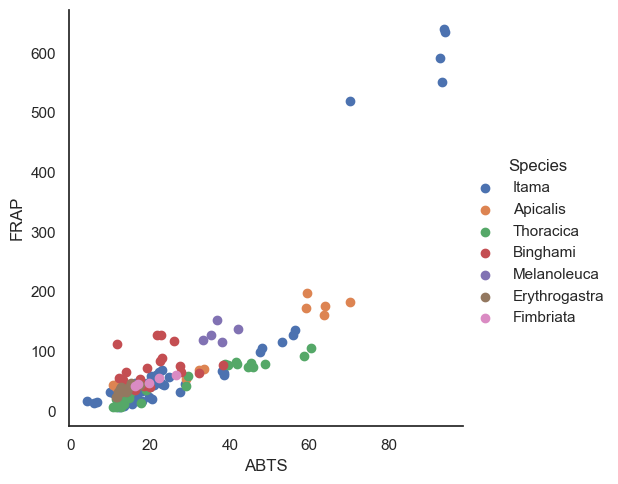

In [26]:
sns.FacetGrid(honey, hue="Species", height = 5).map(plt.scatter, "ABTS", "FRAP").add_legend()
plt.show()

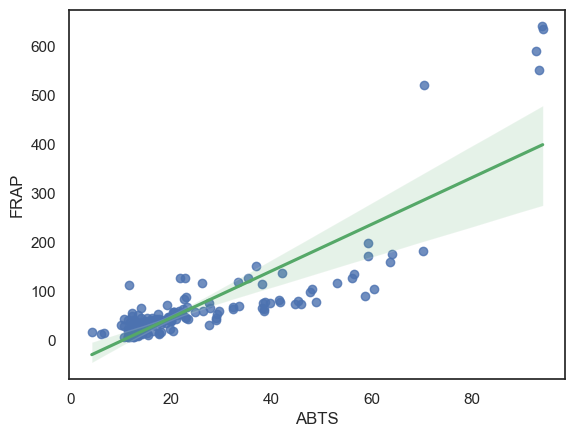

In [27]:
g = sns.regplot(data = honey, x = "ABTS", y = "FRAP", line_kws={'color': 'g'})
plt.show()

As we can see, all the species name is standardize with the capitalization of first letter for every species

the relation between both compound to test antioxidant activities seems to be linearly related

#### Relation between chemical compounds (TPC & TFC)

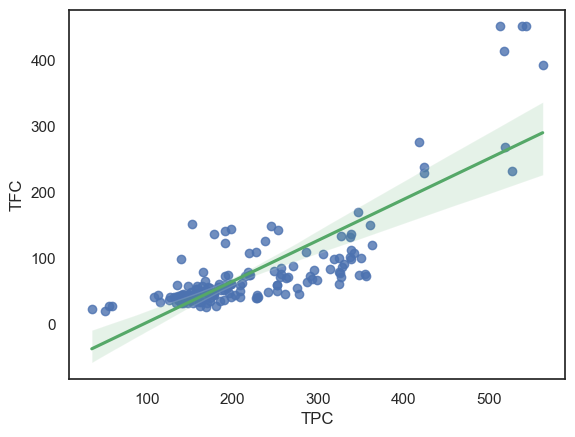

In [28]:
g = sns.regplot(data = honey, x = "TPC", y = "TFC", line_kws={'color': 'g'})
plt.show()

the relation between chemical compounds also shows a linear relation

#### Relation between chemical compounds and antioxidant assays

#### TPC vs ABTS

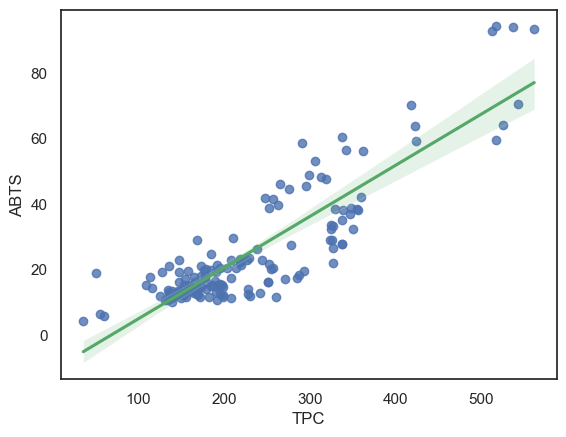

In [29]:
g = sns.regplot(data = honey, x = "TPC", y = "ABTS", line_kws={'color': 'g'})
plt.show()

#### TPC vs FRAP

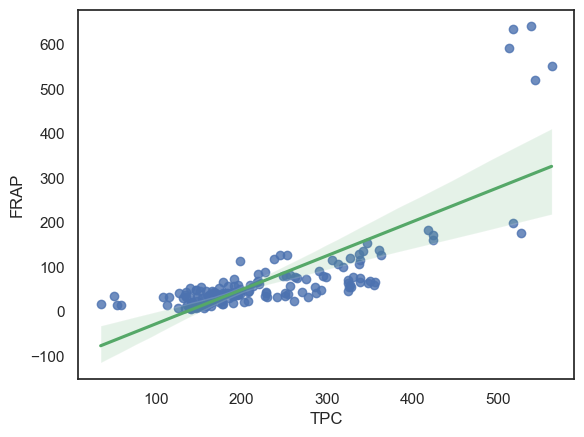

In [30]:
g = sns.regplot(data = honey, x = "TPC", y = "FRAP", line_kws={'color': 'g'})
plt.show()

#### TFC vs ABTS

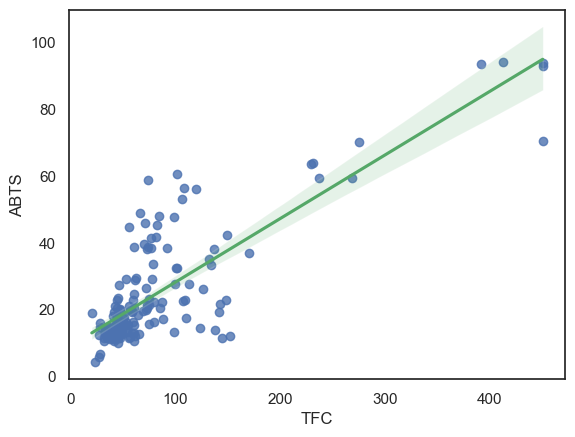

In [31]:
g = sns.regplot(data = honey, x = "TFC", y = "ABTS", line_kws={'color': 'g'})
plt.show()

#### TFC vs FRAP

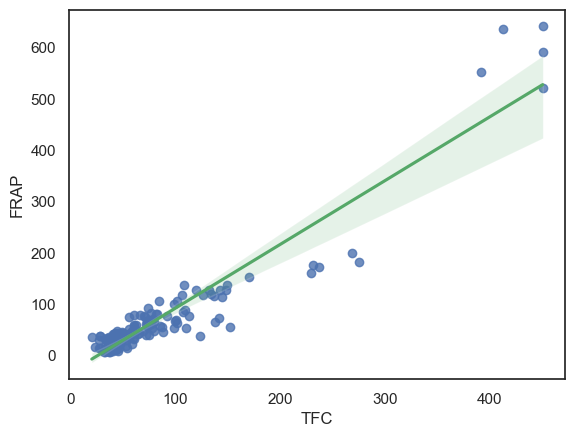

In [32]:
g = sns.regplot(data = honey, x = "TFC", y = "FRAP", line_kws={'color': 'g'})
plt.show()

### Pairplot

Show the relationship between all variables

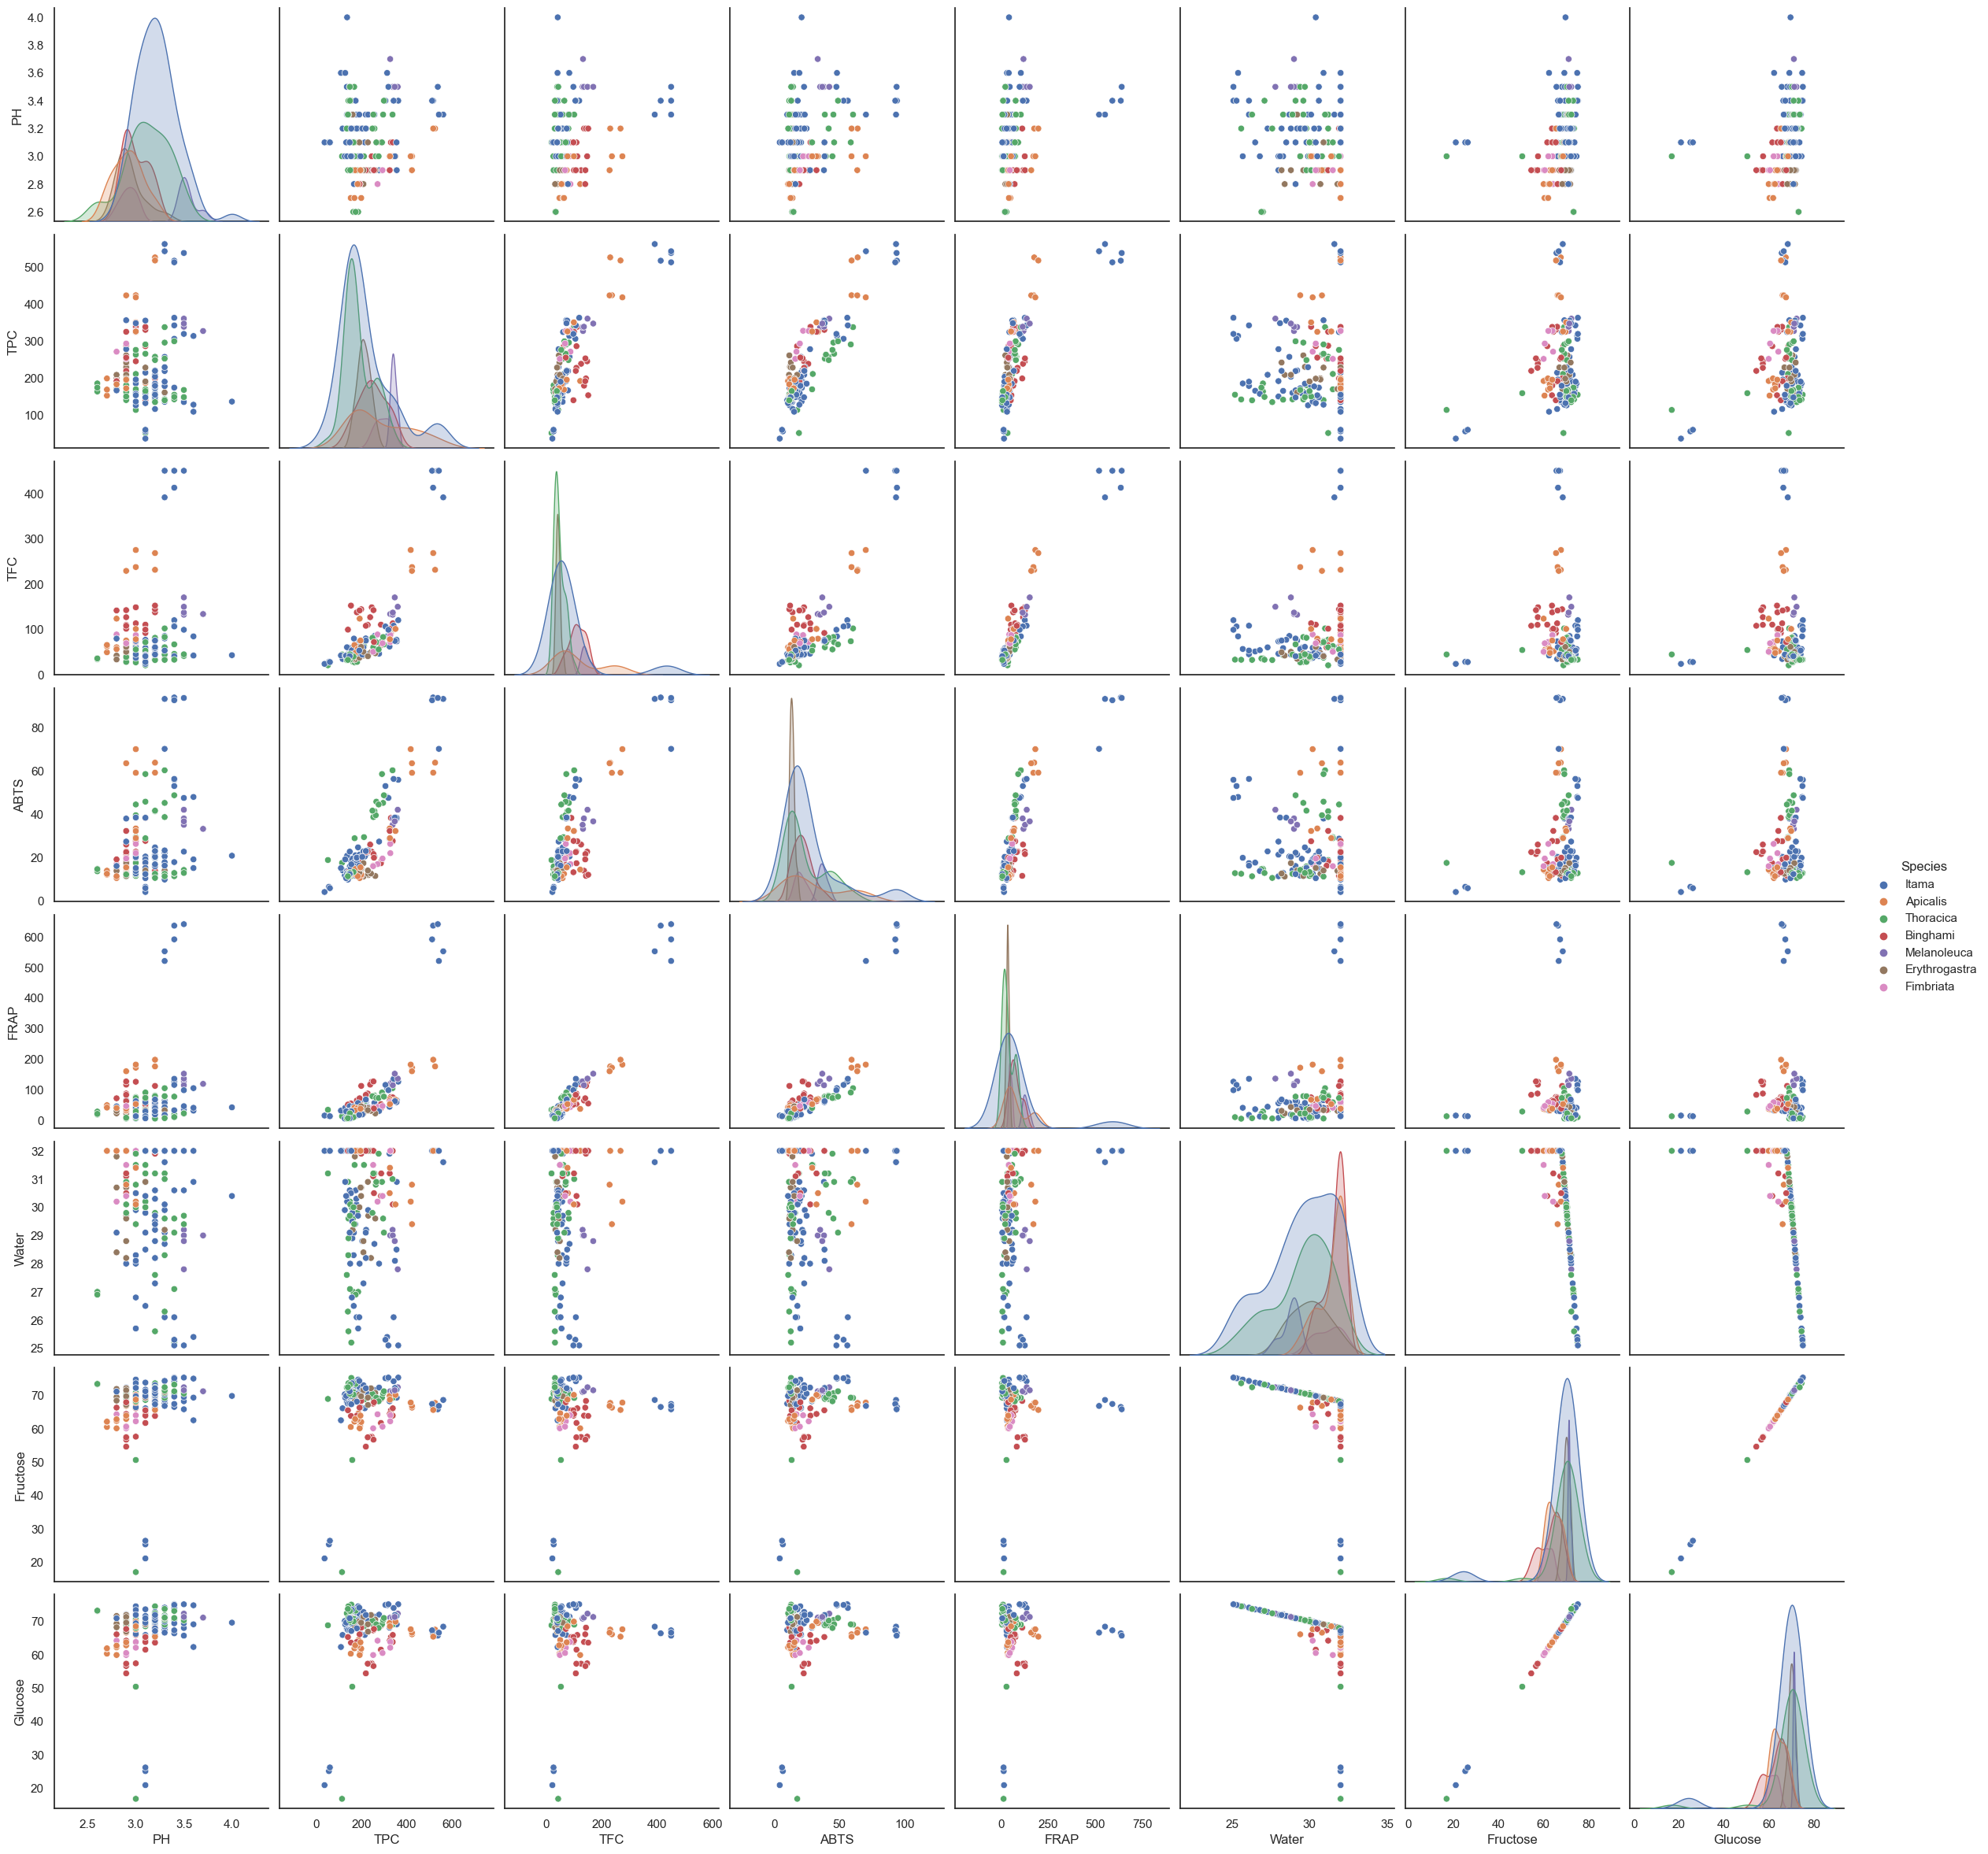

In [33]:
sns.pairplot(honey, hue="Species", size=3)
plt.show()

### Multivariate Visualization with parallel coordinates

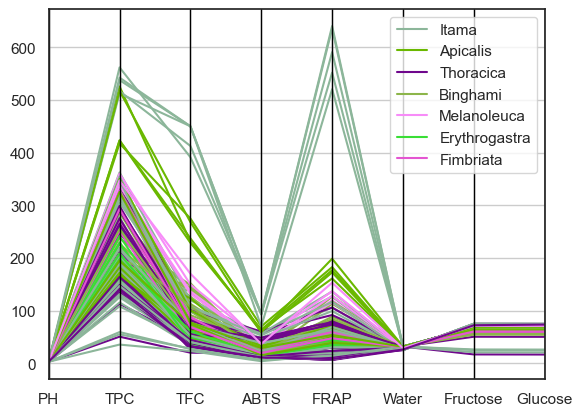

In [34]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(honey, "Species")
plt.show()

# Model Development

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

### Split train-test

In [36]:
# Set a random seed for reproducibility
random_seed = 42
np.random.seed(random_seed)

# Separating the data into dependant and independant variables
X = honey.iloc[:, 1:]
y = honey.iloc[:, 0]

# Splitting the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_seed)

### Feature Selection

Recursive Feature Elimination(RFE)

In [37]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [38]:
model = LogisticRegression()
rfe = RFE(model)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

column_header = list(honey.drop(columns = "Species"))
print("Columns :", column_header)

Num Features: 4
Selected Features: [False False  True  True False  True  True False]
Feature Ranking: [5 4 1 1 2 1 1 3]
Columns : ['PH', 'TPC', 'TFC', 'ABTS', 'FRAP', 'Water', 'Fructose', 'Glucose']


We can see that the 4 most important feature selected is TFC, ABTS, FRAP, and Water. Need further discussion on whether to include in prediction.

### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=random_seed)
classifier_name = classifier.__class__.__name__
classifier.fit(X_train, y_train)

# predict
y_pred = classifier.predict(X_test)

# Summary 
print("Classifier: " + classifier_name + "\n")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score
from sklearn.metrics import accuracy_score

print("accuracy is", accuracy_score(y_pred, y_test))

Classifier: LogisticRegression

               precision    recall  f1-score   support

     Apicalis       0.00      0.00      0.00         3
     Binghami       0.33      1.00      0.50         1
Erythrogastra       0.60      0.75      0.67         4
    Fimbriata       1.00      1.00      1.00         1
        Itama       0.41      0.64      0.50        11
  Melanoleuca       0.00      0.00      0.00         1
    Thoracica       0.40      0.18      0.25        11

     accuracy                           0.44        32
    macro avg       0.39      0.51      0.42        32
 weighted avg       0.40      0.44      0.39        32

[[0 1 0 0 2 0 0]
 [0 1 0 0 0 0 0]
 [0 0 3 0 1 0 0]
 [0 0 0 1 0 0 0]
 [1 0 0 0 7 0 3]
 [0 1 0 0 0 0 0]
 [0 0 2 0 7 0 2]]
accuracy is 0.4375


In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')

# Print the results
print(classifier_name)
print(f"Accuracy: {accuracy:.4f}")
print(f"Micro-average Precision: {precision:.4f}")
print(f"Micro-average Recall: {recall:.4f}")
print(f"Micro-average F1-Score: {f1_score:.4f}")

LogisticRegression
Accuracy: 0.4375
Micro-average Precision: 0.3922
Micro-average Recall: 0.5097
Micro-average F1-Score: 0.4167


### K-Nearest Neighbors

The highest accuracy we can get is when K = 11

In [41]:
from sklearn.neighbors import KNeighborsClassifier

random_seed = 42
np.random.seed(random_seed)

classifier = KNeighborsClassifier(n_neighbors=11)
classifier_name = classifier.__class__.__name__
classifier.fit(X_train, y_train)

# predict
y_pred = classifier.predict(X_test)

# Summary 
print("Classifier: " + classifier_name + "\n")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score
from sklearn.metrics import accuracy_score
print("accuracy is", accuracy_score(y_pred, y_test))

Classifier: KNeighborsClassifier

               precision    recall  f1-score   support

     Apicalis       0.50      0.33      0.40         3
     Binghami       0.33      1.00      0.50         1
Erythrogastra       0.67      1.00      0.80         4
    Fimbriata       0.00      0.00      0.00         1
        Itama       0.54      0.64      0.58        11
  Melanoleuca       0.50      1.00      0.67         1
    Thoracica       1.00      0.55      0.71        11

     accuracy                           0.62        32
    macro avg       0.51      0.65      0.52        32
 weighted avg       0.69      0.62      0.62        32

[[1 0 0 0 2 0 0]
 [0 1 0 0 0 0 0]
 [0 0 4 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 2 1 0 7 1 0]
 [0 0 0 0 0 1 0]
 [0 0 1 0 4 0 6]]
accuracy is 0.625


In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')

# Print the results
print(classifier_name)
print(f"Accuracy: {accuracy:.4f}")
print(f"Micro-average Precision: {precision:.4f}")
print(f"Micro-average Recall: {recall:.4f}")
print(f"Micro-average F1-Score: {f1_score:.4f}")

KNeighborsClassifier
Accuracy: 0.6250
Micro-average Precision: 0.5055
Micro-average Recall: 0.6450
Micro-average F1-Score: 0.5223


### Support Vector Machine

In [43]:
from sklearn.svm import SVC

classifier = SVC(random_state=random_seed)
classifier_name = classifier.__class__.__name__
classifier.fit(X_train, y_train)

# Predict
y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print("Classifier: " + classifier_name + "\n")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

Classifier: SVC

               precision    recall  f1-score   support

     Apicalis       0.00      0.00      0.00         3
     Binghami       0.50      1.00      0.67         1
Erythrogastra       0.00      0.00      0.00         4
    Fimbriata       0.00      0.00      0.00         1
        Itama       0.37      1.00      0.54        11
  Melanoleuca       0.00      0.00      0.00         1
    Thoracica       0.00      0.00      0.00        11

     accuracy                           0.38        32
    macro avg       0.12      0.29      0.17        32
 weighted avg       0.14      0.38      0.21        32

[[ 0  0  0  0  3  0  0]
 [ 0  1  0  0  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0 11  0  0]
 [ 0  1  0  0  0  0  0]
 [ 0  0  0  0 11  0  0]]
accuracy is 0.375


In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')

# Print the results
print(classifier_name)
print(f"Accuracy: {accuracy:.4f}")
print(f"Micro-average Precision: {precision:.4f}")
print(f"Micro-average Recall: {recall:.4f}")
print(f"Micro-average F1-Score: {f1_score:.4f}")

SVC
Accuracy: 0.3750
Micro-average Precision: 0.1238
Micro-average Recall: 0.2857
Micro-average F1-Score: 0.1719


### Decision Trees

In [45]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(random_state=random_seed)
classifier_name = classifier.__class__.__name__
classifier.fit(X_train, y_train)

# Predict
y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print("Classifier: " + classifier_name + "\n")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

Classifier: DecisionTreeClassifier

               precision    recall  f1-score   support

     Apicalis       1.00      1.00      1.00         3
     Binghami       1.00      1.00      1.00         1
Erythrogastra       1.00      0.50      0.67         4
    Fimbriata       0.00      0.00      0.00         1
        Itama       0.60      0.82      0.69        11
  Melanoleuca       1.00      1.00      1.00         1
    Thoracica       0.70      0.64      0.67        11

     accuracy                           0.72        32
    macro avg       0.76      0.71      0.72        32
 weighted avg       0.73      0.72      0.71        32

[[3 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 2 0 1 0 1]
 [0 0 0 0 1 0 0]
 [0 0 0 0 9 0 2]
 [0 0 0 0 0 1 0]
 [0 0 0 0 4 0 7]]
accuracy is 0.71875


In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')

# Print the results
print(classifier_name)
print(f"Accuracy: {accuracy:.4f}")
print(f"Micro-average Precision: {precision:.4f}")
print(f"Micro-average Recall: {recall:.4f}")
print(f"Micro-average F1-Score: {f1_score:.4f}")

DecisionTreeClassifier
Accuracy: 0.7188
Micro-average Precision: 0.7571
Micro-average Recall: 0.7078
Micro-average F1-Score: 0.7179


### Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 100, random_state=random_seed)
classifier_name = classifier.__class__.__name__
classifier.fit(X_train, y_train)

# Predict
y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print("Classifier: " + classifier_name + "\n")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

Classifier: RandomForestClassifier

               precision    recall  f1-score   support

     Apicalis       1.00      1.00      1.00         3
     Binghami       1.00      1.00      1.00         1
Erythrogastra       0.50      0.50      0.50         4
    Fimbriata       1.00      1.00      1.00         1
        Itama       0.69      1.00      0.81        11
  Melanoleuca       1.00      1.00      1.00         1
    Thoracica       1.00      0.55      0.71        11

     accuracy                           0.78        32
    macro avg       0.88      0.86      0.86        32
 weighted avg       0.83      0.78      0.77        32

[[ 3  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0]
 [ 0  0  2  0  2  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  0 11  0  0]
 [ 0  0  0  0  0  1  0]
 [ 0  0  2  0  3  0  6]]
accuracy is 0.78125


In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')

# Print the results
print(classifier_name)
print(f"Accuracy: {accuracy:.4f}")
print(f"Micro-average Precision: {precision:.4f}")
print(f"Micro-average Recall: {recall:.4f}")
print(f"Micro-average F1-Score: {f1_score:.4f}")

RandomForestClassifier
Accuracy: 0.7812
Micro-average Precision: 0.8839
Micro-average Recall: 0.8636
Micro-average F1-Score: 0.8601


In [49]:
from sklearn.metrics import accuracy_score, log_loss
classifiers = [
    KNeighborsClassifier(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    SVC(),
    RandomForestClassifier()
                  ]
 
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)
 
for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    log_entry = pd.DataFrame([[name, acc*100, 11]], columns=log_cols)
    log = log.append(log_entry)
    
    print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 59.3750%
LogisticRegression
****Results****
Accuracy: 43.7500%
DecisionTreeClassifier
****Results****
Accuracy: 71.8750%
SVC
****Results****
Accuracy: 37.5000%
RandomForestClassifier
****Results****
Accuracy: 78.1250%


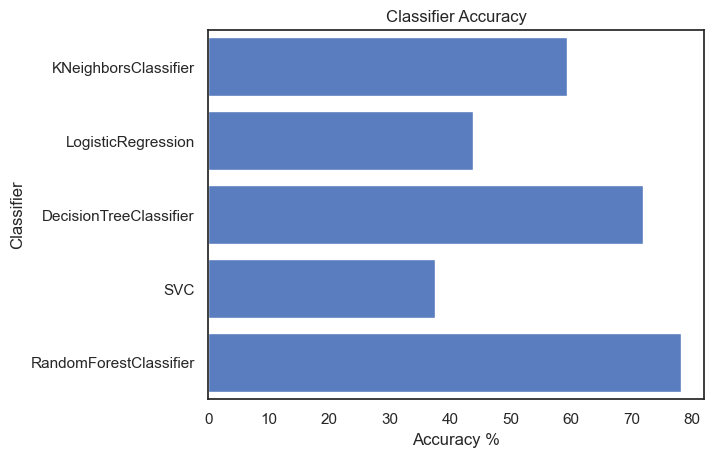

In [50]:
sns.set_color_codes("muted")
sns.barplot(x="Accuracy", y="Classifier", data=log, color="b")

plt.xlabel("Accuracy %")
plt.title("Classifier Accuracy")
plt.show()

We can see that Random Forest classifier have the highest accuracy compared to the other models. Hence, Random Forest will be chosen as the best model. 

### Evaluating Random Forest

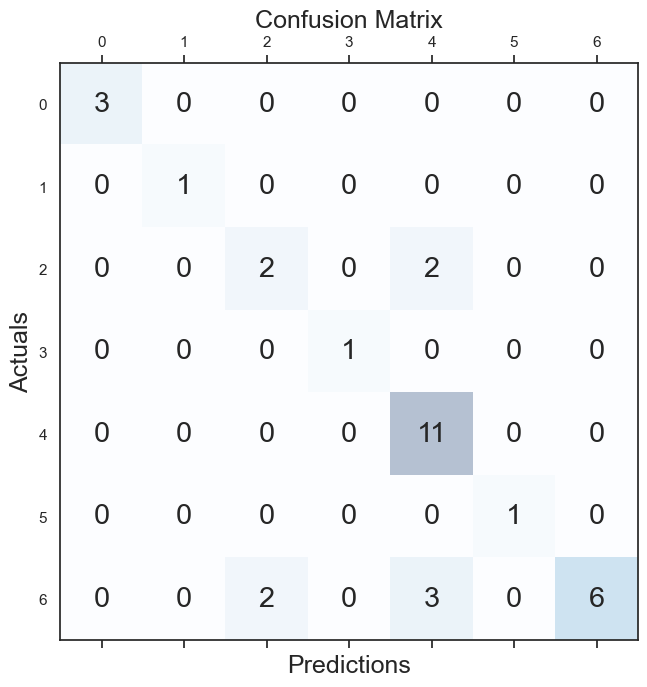

In [51]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### Save model in pickle file for deployment

In [52]:
import pickle

# save the fitted model
with open("RandomForest.pkl", "wb") as f:
    pickle.dump(classifier, f)  

# load
with open("RandomForest.pkl",  "rb") as f:
    classifier = pickle.load(f)

Find the minimum and maximum value of each columns for the purpose of sliders in GUI Development

In [53]:
PH = {honey["PH"].min(), honey["PH"].max()}
TPC = {honey["TPC"].min(), honey["TPC"].max()}
TFC = {honey["TFC"].min(), honey["TFC"].max()}
ABTS = {honey["ABTS"].min(), honey["ABTS"].max()}
FRAPS = {honey["FRAP"].min(), honey["FRAP"].max()} 
Water = {honey["Water"].min(), honey["Water"].max()}
Fructose = {honey["Fructose"].min(), honey["Fructose"].max()}
Glucose = {honey["Glucose"].min(), honey["Glucose"].max()}

PH, TPC, TFC, ABTS, FRAPS, Water, Fructose, Glucose

({2.6, 4.0},
 {35.68, 562.06},
 {20.3, 450.29},
 {4.15, 94.09},
 {6.43, 640.69},
 {25.1, 32.0},
 {17.0, 75.3},
 {16.8, 75.1})

Find the mean for default value for each column

In [54]:
PH_mean = value=round(honey["PH"].mean(),2)
TPC_mean = value=round(honey["TPC"].mean(),2)
TFC_mean = value=round(honey["TFC"].mean(),2)
ABTS_mean = value=round(honey["ABTS"].mean(),2)
FRAP_mean = value=round(honey["FRAP"].mean(),2)
Water_mean = value=round(honey["Water"].mean(),2)
Fructose_mean = value=round(honey["Fructose"].mean(),2)
Glucose_mean = value=round(honey["Glucose"].mean(),2)

PH_mean, TPC_mean, TFC_mean, ABTS_mean, FRAP_mean, Water_mean, Fructose_mean, Glucose_mean

(3.11, 227.23, 82.13, 24.78, 69.62, 30.09, 67.42, 67.25)

# GUI Development (Model Deployment)

For deploying the model, Gradio is chosen because it allows us  to create demos of our machine learning model. It is easy to implement with supportive libraries.

In [55]:
import gradio as gr
import pickle

Itama_desc = "Honey from H.itama can reverse the weight gained from a high-fat diet. In addition, it can significally reduce BMI, adiposity index, and relative organ weight"
Binghami_desc = "Honey from T.Binghami is rich in phenolic contents, which is more valuable than others. With low reducing sugar, this honey might taste relatively sour!"
Apicalis_desc = "T.Apicalis"
Erythrogastra_desc = "H.Erythrogastra have the highest bacterial diversity compared to the other species"
Thoracica_desc = "Honey from G.Thoracica has low moisture content and low bacterial diversity"
Fimbriata_desc = "Honey from H.Fimbriata had the highest antimicrobial activity against bacteria"
Melanoleuca_desc = "T.Melanoleuca honey have high moisture which can encourage the growth of bacteria"
Adultered_desc = "The adverse health impact of honey adulteration on consumers may lead to increased blood sugar, followed by the release of the insulin hormone and type II diabetes, abdominal weight gain and obesity, a rise in the blood lipid levels, and high blood pressure"

# bee = gr.Image(value = "https://drive.google.com/file/d/1_Z1ez9LIfIYZPCCjb7BpH1-pLtrdaTbV/view?usp=sharing")

def make_prediction(PH, TPC, TFC, ABTS, FRAP, Water, Fructose, Glucose, Adulterants):
    if Adulterants == True: 
        return "Oh no! This honey is adultered!", Adultered_desc
    with open("RandomForest.pkl", "rb") as f:
        classifier = pickle.load(f)
        preds = classifier.predict([[PH, TPC, TFC, ABTS, FRAP, Water, Fructose, Glucose]])
    if preds == "Itama":
        return "This honey is from the Itama species", Itama_desc
    elif preds == "Apicalis":
        return "This honey is from the Apicalis species" , Apicalis_desc
    elif preds == "Erythrogastra":
        return "This honey is from  the Erythrogastra species",Erythrogastra_desc
    elif preds == "Binghami":
        return "This honey is from the Binghami species", Binghami_desc
    elif preds == "Thoracica":
        return "This honey is from the Thoracica species", Thoracica_desc
    elif preds == "Fimbriata":
        return "This honey is from the Fimbriata species", Fimbriata_desc
    return "This honey is from the Melanoleuca species", Melanoleuca_desc

PH_input = gr.Slider(2.6, 4.0, label = "pH value", value=3.11)
TPC_input = gr.Slider(35.68, 562.06, label = "Total Phenolic Content, TPC", value=227.23)
TFC_input = gr.Slider(20.3, 450.29, label = "Total Flavonoid Content, TFC", value=82.13)
ABTS_input = gr.Slider(4.15, 94.09, value= 24.78)
FRAP_input = gr.Slider(6.43, 640.69, value= 69.62)
Water_input = gr.Slider(21.38, 32.0, label = "Water Content", value=27.2)
Fructose_input = gr.Slider(17.0, 75.3, label = "Fructose Content", value=67.42)
Glucose_input = gr.Slider(16.8, 75.1, label = "Glucose Content", value=67.25)
Contain_adulterants = gr.Checkbox(label = "Does it contain other kinds of sugar e.g cane sugar, corn syrup, palm sugar, etc.?")

reference = gr.Textbox(label = "Honey Description")

app = gr.Interface(fn=make_prediction, 
                   inputs=[PH_input, TPC_input, TFC_input, ABTS_input, FRAP_input, Water_input, Fructose_input, Glucose_input, Contain_adulterants], 
                   outputs= [gr.Label(label="Result"), reference], 
                   examples = [[2.6, 35.68, 20.3, 4.15, 6.43, 21.38, 17.0, 16.8],
                               [4.0, 562.06, 450.29, 94.09, 640.69, 32.0, 75.3, 75.1],
                               [3.3, 139.3, 32.26, 11.42, 8.2, 26.3, 72.4, 73.7]],
                   live=True, 
                   title="Pollenize - A stingless Bee Honey Classifier", 
                   description="Utilize this classifier to determine which species of stingless bee is your honey from! \n Note that if you do not know the value of a specific component/attribute, just leave it as it is. The default value corresponds to the mean of the attribute."
                  )
app.launch(share = True, auth = ("admin", "admin"), auth_message = "Please ask admin(Muhammad Zariff Wafiy)'s permission to access classifier.")
# app.launch()

Running on local URL:  http://127.0.0.1:7860

Could not create share link, please check your internet connection.
